In [19]:
%pylab inline
from ipywidgets import interact_manual

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#fname = '../experiment3_1/simulated1_c4_e0.01_k21.dist'
fname = '../data/histograms/e_c4_k21.hist'

In [5]:
import sys
sys.path.append('..')
from covest import *
from models import *
hist_orig, hist = load_hist(fname)

In [6]:
model = RepeatsModel(21, 100, hist)

In [7]:
model.compute_loglikelihood(10, 0.05, 0.9, 0.9, 0.9)

-5398132.095137997

In [8]:
import multiprocessing

try:
    cpus = multiprocessing.cpu_count()
except NotImplementedError:
    cpus = 2   # arbitrary default
    
pool = multiprocessing.Pool(processes=cpus)
print(cpus)

4


In [14]:
from functools import partial
count = 10
base_c = 5
range_c = 5
step_c = range_c/count
base_e = 0.1
range_e = 0.1
step_e = range_e/count

c_vals = arange(base_c - range_c, base_c + range_c, step_c)
e_vals = arange(base_e - range_e, base_e + range_e, step_e)

def compute_loglikelihood(payload, c, e):
    q1, q2, q = payload
    return model.compute_loglikelihood(c, e, q1, q2, q)


def compute_ll_for_params(q1=0.9, q2=0.9, q=0.9):
    payload = q1, q2, 1
    # f1 = np.array([[compute_loglikelihood(c, e) for e in e_vals] for c in c_vals])
    f1 = array([list(
            pool.map(partial(compute_loglikelihood, payload, c), arange(base_e - range_e, base_e + range_e, step_e))
        ) for c in arange(base_c - range_c, base_c + range_c, step_c)
    ])
    f1[isinf(f1)] = NaN
    return f1


In [15]:
def transform_for_visualisation(a):
    min_val, max_val = nanmin(a), nanmax(a)
    print(max_val)
    def transform(x):
        return log(1 - ((x - min_val) / (max_val - min_val + 1)))
    vtransform = vectorize(transform)
    return vtransform(a)

In [16]:
def draw_plot_for_q(q1=0.9, q2=0.9, q=0.9):
    f1 = compute_ll_for_params(q1, q2, q)
    ax = imshow(        
        transform_for_visualisation(f1), interpolation='none', cmap = 'jet',
        extent=[e_vals[0],e_vals[-1],c_vals[-1],c_vals[0]], aspect='auto',
    )
    colorbar(ax)
    show()

-4911069.08348


/home/michal/.virtualenvs/covest/lib/python3.5/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


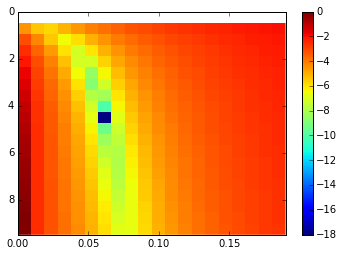

In [20]:
interact_manual(draw_plot_for_q, q1=(0.0, 1.0, .05), q2=(0.0, 1.0, 0.05), q=(0.0, 1.0, 0.05))